**Question 1:** **Linear Regression with Gradient Descent**

You have below loosely correlated values of X and Y in arrays. You are expected to write the code to carry out linear regression with gradient descent for the provided data. Ensure each step of the process is properly documented using a text block in your notebook just before the code block.



Requirements:



*   Print out the MSE after each cycle of training.

*   Plot a graph of the cost function as training progresses.


*  Print out the final values of your model parameters, m and c.


*   Plot a scatter graph of the original X, Y values along with a line graph of the final linear model after training.




In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([0., 0.52631579, 1.05263158, 1.57894737, 2.10526316,
              2.63157895, 3.15789474, 3.68421053, 4.21052632, 4.73684211,
              5.26315789, 5.78947368, 6.31578947, 6.84210526, 7.36842105,
              7.89473684, 8.42105263, 8.94736842, 9.47368421, 10.])
Y = np.array([2.60943416, 1.76213705, 7.18511292, 9.40744522, 5.46635068,
              8.6061673, 13.30831239, 14.26225166, 16.70323979, 16.87285951,
              22.17984858, 23.81874177, 24.23732455, 28.20185083, 28.72449237,
              27.91299402, 32.21118578, 31.39802427, 36.91479534, 36.90014818])

**Step 1:** Initialize Parameters and Define Functions

In [2]:
# Initialize slope (m) and intercept (c)
m = 0.0
c = 0.0

# LR (α)
learning_rate = 0.001

# Number of iterations
epochs = 1000

# MSE fxn
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# fxn of gd
def gradient_descent_step(X, Y, m, c, learning_rate):
    n = len(X)
    y_pred = m * X + c
    dm = (-2/n) * np.sum(X * (Y - y_pred))
    dc = (-2/n) * np.sum(Y - y_pred)

    m = m - learning_rate * dm
    c = c - learning_rate * dc
    return m, c

**Step 2:**  Training Loop

In [3]:
costs = []

for epoch in range(epochs):
    #  predictions
    y_pred = m * X + c

    #  cost
    cost = mse(Y, y_pred)
    costs.append(cost)

    # GD step
    m, c = gradient_descent_step(X, Y, m, c, learning_rate)

    # Print MSE every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MSE = {cost:.4f}")

print("\n Final Parameters:")
print(f"m (slope) = {m:.4f}")
print(f"c (intercept) = {c:.4f}")

Epoch 0: MSE = 499.6112
Epoch 100: MSE = 2.9893
Epoch 200: MSE = 2.9693
Epoch 300: MSE = 2.9516
Epoch 400: MSE = 2.9356
Epoch 500: MSE = 2.9212
Epoch 600: MSE = 2.9082
Epoch 700: MSE = 2.8965
Epoch 800: MSE = 2.8860
Epoch 900: MSE = 2.8766

 Final Parameters:
m (slope) = 3.6749
c (intercept) = 0.9191


**Step 3:** Plot Cost Function

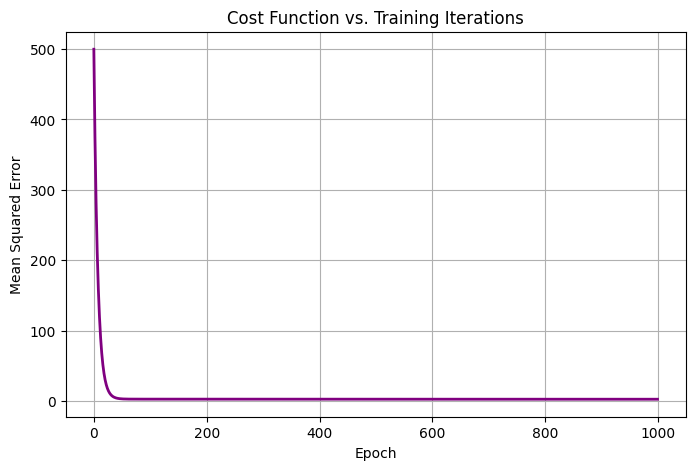

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), costs, color='purple', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Cost Function vs. Training Iterations")
plt.grid(True)
plt.show()

**Step 4:** Plot the final linear regression line

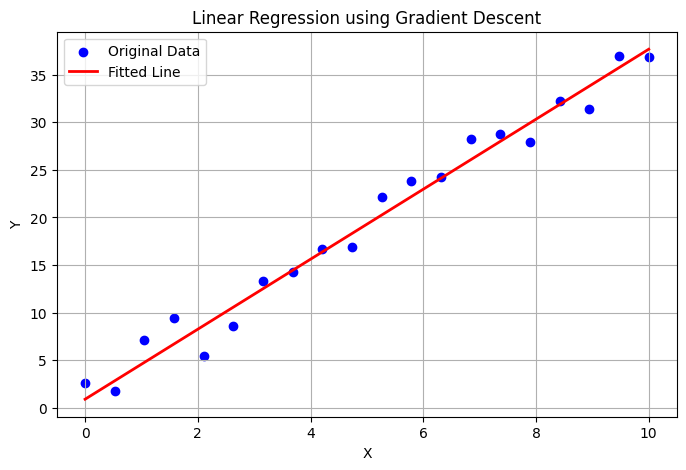

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, m * X + c, color='red', linewidth=2, label='Fitted Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

**Question 2:** **Multivariable Linear Regression with Gradient Descent**

The following Kaggle link https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset/data contains correlated data containing two independent and one dependent variables. Use this dataset to implement a linear regression of multiple variables with gradient descent, following the same approach as the linear regression with single variables. Ensure each step of the process is properly documented using a text block in your notebook just before the code block.

Tip: Since there are now two independent variables, you will have m1, m2 and c and your linear model will be ŷ = m1x1 + m2x2 + c

Tip: Note that you don't need to download the file from Kaggle as you can directly load the training data from your Jupyter Notebook.



Requirements:


*  Print out the MSE after each cycle of training.
*   Plot a graph of the cost function as training progresses.
*   Print out the final values of m1, m2 and c after training is complete



**MULTIVARIABLE LINEAR REGRESSION WITH GRADIENT DESCENT**

Model equation:
#     ŷ = m1*x1 + m2*x2 + c

**Step 1:** Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Step 2 :** Load and Inspect the Dataset

In [8]:
data = pd.read_csv("multiple_linear_regression_dataset.csv")

print("Dataset loaded successfully!")
print(data.head())
print("\nDataset Information:")
print(data.info())

Dataset loaded successfully!
   age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes
None


**Step 3:** Extract Features and Target

In [9]:
x1 = data['age'].values          # Independent variable 1
x2 = data['experience'].values   # Independent variable 2
y  = data['income'].values       # Dependent variable

# Number of samples
n = len(y)


**Step 4:** Initialize Parameters

In [10]:
m1 = 0      # Slope for x1
m2 = 0      # Slope for x2
c  = 0      # Intercept

learning_rate = 0.0001
epochs = 1000

# Store cost values for plotting
cost_history = []

**Step 5:** Gradient Descent Training

In [11]:
for i in range(epochs):
    # Predicted values
    y_pred = m1 * x1 + m2 * x2 + c

    # Calculate MSE
    cost = (1/n) * np.sum((y - y_pred) ** 2)
    cost_history.append(cost)

    # Compute gradients
    dm1 = (-2/n) * np.sum(x1 * (y - y_pred))
    dm2 = (-2/n) * np.sum(x2 * (y - y_pred))
    dc  = (-2/n) * np.sum(y - y_pred)

    # Update parameters
    m1 -= learning_rate * dm1
    m2 -= learning_rate * dm2
    c  -= learning_rate * dc

    # Print MSE every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: MSE = {cost:.4f}")

Iteration 0: MSE = 1727049635.0000
Iteration 100: MSE = 66491868.5531
Iteration 200: MSE = 61752567.2012
Iteration 300: MSE = 58616531.0785
Iteration 400: MSE = 56528801.5395
Iteration 500: MSE = 55126542.0295
Iteration 600: MSE = 54172526.9489
Iteration 700: MSE = 53511656.1429
Iteration 800: MSE = 53042523.7280
Iteration 900: MSE = 52698829.5633


**Step 6:** Display Final Parameters

In [12]:
print("\nTraining Complete!")
print(f"Final m1 (slope for age) = {m1:.4f}")
print(f"Final m2 (slope for experience) = {m2:.4f}")
print(f"Final c (intercept) = {c:.4f}")


Training Complete!
Final m1 (slope for age) = 764.7541
Final m2 (slope for experience) = 1371.0343
Final c (intercept) = 321.7364


**Step 7:** Plot Cost Function

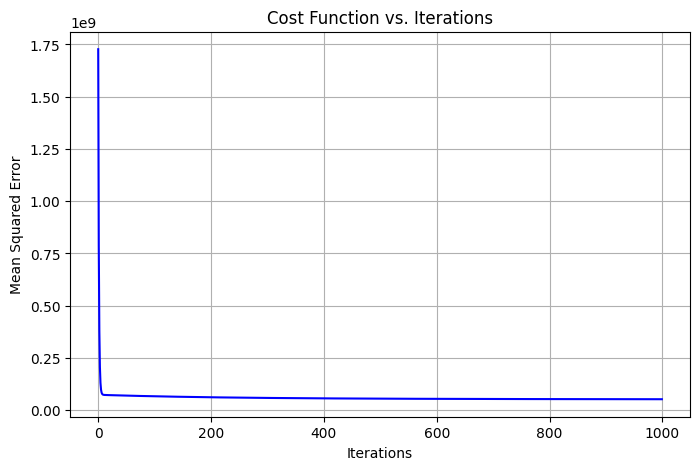

In [13]:
plt.figure(figsize=(8,5))
plt.plot(range(epochs), cost_history, color='blue')
plt.title("Cost Function vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

**Step 8:** Compare Actual vs Predicted Values

In [14]:
y_final_pred = m1 * x1 + m2 * x2 + c
comparison = pd.DataFrame({
    'Actual': y,
    'Predicted': y_final_pred
})
print("\nSample comparison between Actual and Predicted values:")
print(comparison.head(10))


Sample comparison between Actual and Predicted values:
   Actual     Predicted
0   30450  20811.622196
1   35670  27377.461101
2   31580  39007.245803
3   40130  31649.037828
4   47830  46916.504001
5   41630  48921.433561
6   41340  28590.021591
7   37650  31042.757583
8   40250  35472.808124
9   45150  41115.419155


**Step 9:** Plot the final regression plane with actual data points

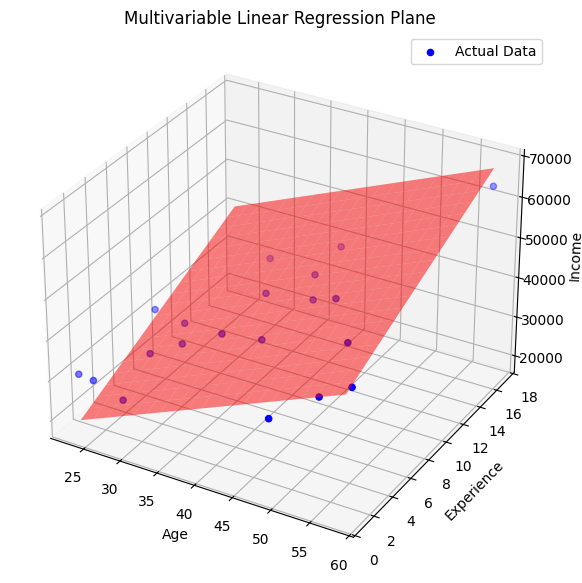

In [15]:

from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data points
ax.scatter(x1, x2, y, color='blue', label='Actual Data')

# Create a meshgrid for x1 and x2
x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 20),
                               np.linspace(min(x2), max(x2), 20))

# Calculate predicted y values on the grid
y_grid = m1 * x1_grid + m2 * x2_grid + c

# Plot regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')
ax.set_title('Multivariable Linear Regression Plane')
ax.legend()

plt.show()
